PRIMERA PARTE: ANÁLISIS ESTADÍSTICO DE SEÑALES
Sara Palacio Duque 
CC:1007940687 

Implementación de funciones

In [1]:
import numpy as np
import scipy.io as sio

data = sio.loadmat("signals.mat")
print(data.keys())


def calc_rms(signal):
    return np.sqrt(np.mean(signal**2))


dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


Análisis estadístico de ECG

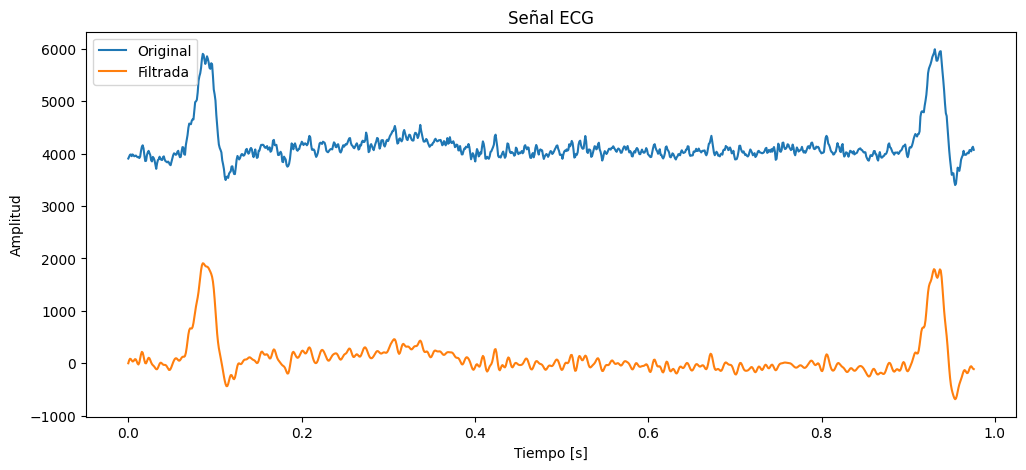

In [99]:
import matplotlib.pyplot as plt
import numpy as np

#1
fs = 1024  # Tasa de muestreo
ecg_as = data["ECG_asRecording"].squeeze()   # aplanar a vector 1D
ecg_fil = data["ECG_filtered"].squeeze()     # aplanar a vector 1D

N1 = len(ecg_as)  # muestras 
t1 = np.arange(N1) / fs  # Vector de tiempo 

N2 = len(ecg_fil)  # muestras 
t2 = np.arange(N2) / fs  # Vector de tiempo 

#2 
plt.figure(figsize=(12,5))
plt.plot(t1[:1000], ecg_as[:1000], label="Original")
plt.plot(t2[:1000], ecg_fil[:1000], label="Filtrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.title("Señal ECG")
plt.show()




El filtrado atenúa frecuencias fuera de la banda de interés del ECG, usualmente se usan pasa bandas de 0.5–50 Hz,Se observa menor ruido de alta frecuencia y la morfología de las ondas P, QRS y T es más evidente; La señal no filtrada presenta un offset en torno a 4000 unidades debido a la componente continua introducida durante la adquisición, al aplicar el filtrado pasa banda, se elimina la componente de muy baja frecuencia y la señal se centra en cero, lo que permite analizar adecuadamente la morfología del ECG sin distorsión.

C:\Users\sarap\AppData\Local\Temp\ipykernel_13260\1430754176.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


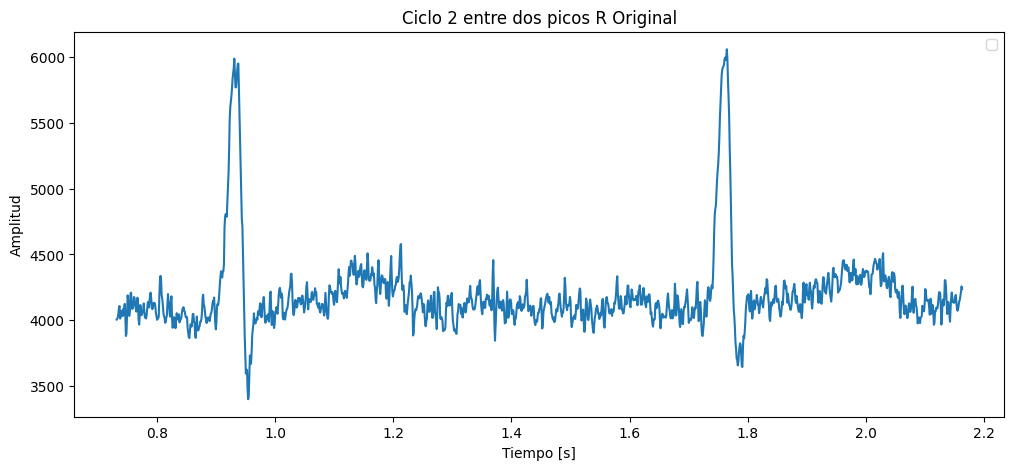

Media: 4191.681652607362
RMS: 4203.374455245571
Varianza: 98161.73420581133
Desviación estándar: 313.3077308427153


In [39]:
#3

from scipy.signal import find_peaks

# Detectar picos R
peaks, _ = find_peaks(ecg_as, distance=int(0.6*fs))  
# distance ~0.6s asegura que no se detecten falsos picos muy juntos
before = int(0.2 * fs)   # 200 ms antes
after = int(0.4 * fs)    # 400 ms después

# Escoger un ciclo entre dos picos R
i = 1  
start = max(peaks[i]-before,0)
end = min(peaks[i+1] + after,N1)
cycle = ecg_as[start:end]
time_cycle = t1[start:end]

plt.figure(figsize=(12,5))
plt.plot(time_cycle, cycle)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Ciclo {i+1} entre dos picos R Original")
plt.legend()
plt.show()

print("Media:", np.mean(cycle))
print("RMS:", np.sqrt(np.mean(cycle**2)))
print("Varianza:", np.var(cycle))
print("Desviación estándar:", np.std(cycle))




El ciclo seleccionado muestra media demasiado elevada, esto ocurre porque los valores de esta señal son elevados, sin embargo se refleja un comportamiento repetitivo del ECG. La varianza es baja, lo que indica poca dispersión entre muestras del ciclo.

C:\Users\sarap\AppData\Local\Temp\ipykernel_13260\3031358219.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


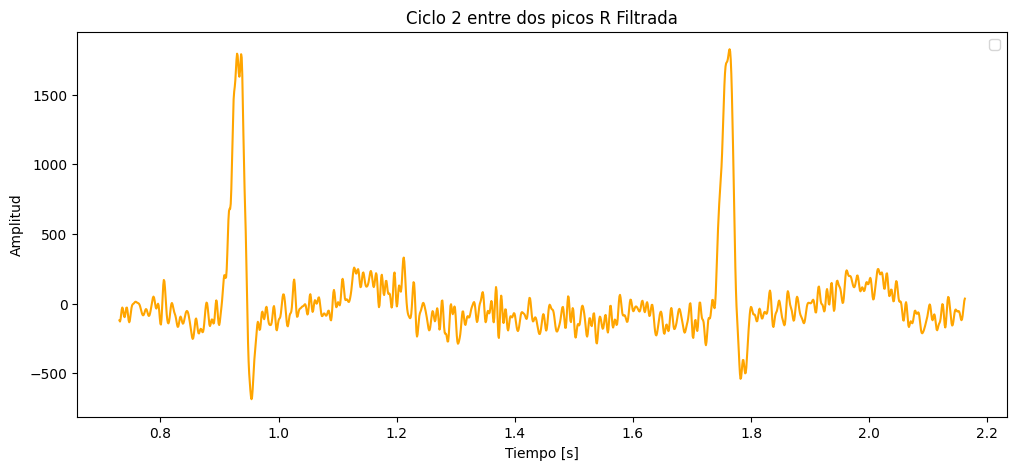

Media: 6.947882504378936
RMS: 311.197647395552
Varianza: 96795.70267323166
Desviación estándar: 311.12007757975323


In [96]:
#4
# Detectar picos R
peaks, _ = find_peaks(ecg_fil, distance=int(0.6*fs))  
# distance ~0.6s asegura que no se detecten falsos picos muy juntos
before = int(0.2 * fs)   # 200 ms antes
after = int(0.4 * fs)    # 400 ms después

# Escoger un ciclo entre dos picos R
i = 1  
start = max(peaks[i]-before,0)
end = min(peaks[i+1] + after,N2) 
cycle = ecg_fil[start:end]
time_cycle = t2[start:end]

plt.figure(figsize=(12,5))
plt.plot(time_cycle, cycle, color='orange')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Ciclo {i+1} entre dos picos R Filtrada")
plt.legend()
plt.show()

print("Media:", np.mean(cycle))
print("RMS:", np.sqrt(np.mean(cycle**2)))
print("Varianza:", np.var(cycle))
print("Desviación estándar:", np.std(cycle))




Señal filtrada: media cercana a cero, varianza menor.

Señal sin filtrar: varianza más alta, presencia de ruido.

El filtrado reduce la variabilidad de la señal, evidenciado en la menor varianza y desviación estándar, esto sugiere que el filtro permitió conservar las componentes fisiológicas y atenuar el ruido. Ademas el RMS nos indica que la señal sin filtran tiene mas energia que la filtrada 

Ciclo 1: Media = 71.4934, Varianza = 110184.2747
Ciclo 2: Media = 6.9479, Varianza = 96795.7027
Ciclo 3: Media = -1.0415, Varianza = 88244.7538
Ciclo 4: Media = 15.9379, Varianza = 90287.5401
Ciclo 5: Media = 24.1978, Varianza = 93881.0934
Ciclo 6: Media = 8.1291, Varianza = 93610.8014
Ciclo 7: Media = 13.1657, Varianza = 88888.2247
Ciclo 8: Media = 18.1234, Varianza = 87673.6188
Ciclo 9: Media = 15.2707, Varianza = 87294.4494
Ciclo 10: Media = 16.7852, Varianza = 83410.0529
Ciclo 11: Media = 8.3043, Varianza = 89789.1294
Ciclo 12: Media = 18.9900, Varianza = 97926.8035
Ciclo 13: Media = 11.9156, Varianza = 100611.6333
Ciclo 14: Media = 7.9301, Varianza = 94059.9721
Ciclo 15: Media = 27.1992, Varianza = 94050.7221


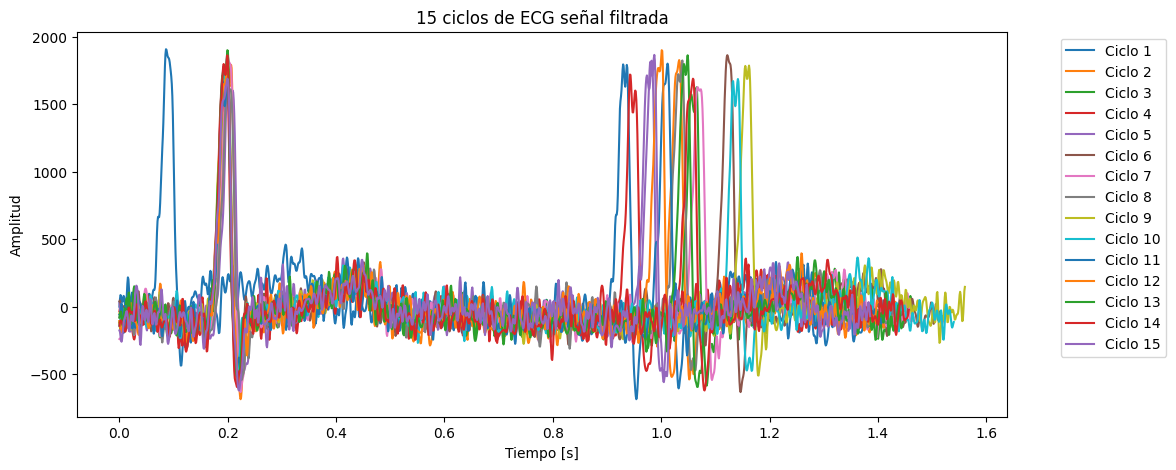

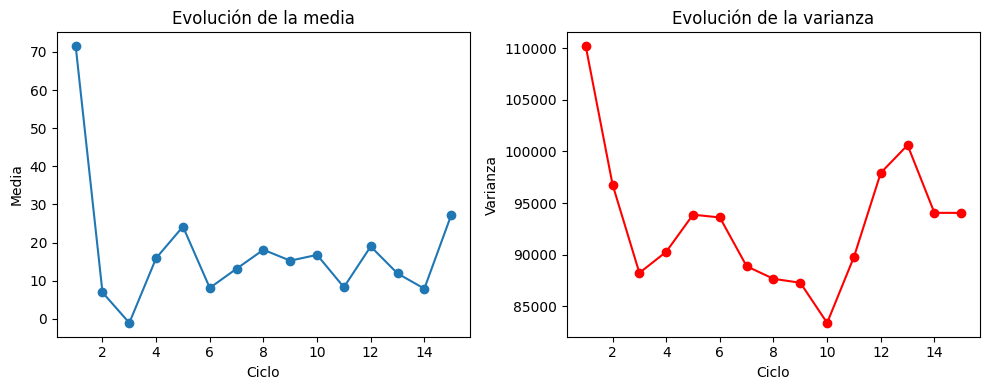

In [100]:
#5

# Tomar los primeros 15 ciclos
n_cycles = 15
cycles = []

for i in range(n_cycles):
    start = max(peaks[i]-before,0)
    end = min(peaks[i+1] + after,N2)
    cycles.append(ecg_fil[start:end])

# Calcular estadísticas de cada ciclo
stats = []
for i, cycle in enumerate(cycles):
    mean_val = np.mean(cycle)
    var_val = np.var(cycle)
    stats.append((mean_val, var_val))
    print(f"Ciclo {i+1}: Media = {mean_val:.4f}, Varianza = {var_val:.4f}")
    
#Grafica
plt.figure(figsize=(12, 5))
for i, cycle in enumerate(cycles):
    plt.plot(np.arange(len(cycle))/fs, cycle, label=f"Ciclo {i+1}")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("15 ciclos de ECG señal filtrada")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Graficar evolución de la media y varianza ciclo a ciclo
means = [m for m, v in stats]
vars_ = [v for m, v in stats]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, n_cycles+1), means, marker='o')
plt.xlabel("Ciclo")
plt.ylabel("Media")
plt.title("Evolución de la media")

plt.subplot(1,2,2)
plt.plot(range(1, n_cycles+1), vars_, marker='o', color="red")
plt.xlabel("Ciclo")
plt.ylabel("Varianza")
plt.title("Evolución de la varianza")
plt.tight_layout()
plt.show()




A primera vista los ciclos se ven que no son estacionarios ya que el ECG no es estrictamente igual en cada uno de ellos, esto se nota mas que todo en el segundo P, QRS y T ya que en el primero que aparece se ven muy igual en cada ciclo.

Sin embargo, estadisticamente se observa que el primer ciclo presenta valores atípicos de media y varianza, lo cual puede deberse a ruido o error en la detección de picos R. Excluyendo este ciclo, la media se mantiene entre 0 y 25 y la varianza en un rango entre 88,000 y 100,000, lo que indica que las diferencias estadísticas entre ciclos son pequeñas. Esto sugiere que la señal puede considerarse aproximadamente estacionaria en este análisis.


In [113]:
#6
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
# Escoger dos ciclos 
i, j = 6, 11

cycle1 = ecg_fil[peaks[i]:peaks[i+1]]
cycle2 = ecg_fil[peaks[j]:peaks[j+1]]

# Verificar normalidad con Shapiro-Wilk
stat1, p1 = shapiro(cycle1)
stat2, p2 = shapiro(cycle2)
print("Shapiro ciclo 1 p-value:", p1)
print("Shapiro ciclo 2 p-value:", p2)

normal1 = p1 > 0.05
normal2 = p2 > 0.05

# Verificar homocedasticidad (igualdad de varianzas) con Levene
stat_levene, p_levene = levene(cycle1, cycle2)
print("Levene p-value:", p_levene)

homo = p_levene > 0.05

# Selección de prueba estadística
if normal1 and normal2 and homo:
    # Si ambos ciclos son normales y con varianzas iguales: usar t-test
    stat_t, p_t = ttest_ind(cycle1, cycle2)
    print("\nUsando t-test")
    print("t =", stat_t, " p-value =", p_t)
else:
    # Si no cumplen supuestos: usar Mann-Whitney U
    stat_U,p_u = mannwhitneyu(cycle1, cycle2)
    print("\nUsando Mann-Whitney U")
    print("p-value =" ,p_u)


Shapiro ciclo 1 p-value: 7.371831496143228e-43
Shapiro ciclo 2 p-value: 5.771927525834172e-41
Levene p-value: 0.2253859584170882

Usando Mann-Whitney U
p-value = 0.49055910238048817


Shapiro-Wilk (normalidad):

p > 0.05 → la distribución puede considerarse normal.

p < 0.05 → no es normal.

Un ciclo de ECG no es perfectamente normal porque la onda PQRT tiene picos definidos, el p-value < 0.05  lo que indica que no es normal.
En este caso de no cumplir normalidad, se usa Mann-Whitney.

Levene (homocedasticidad):

p > 0.05 → varianzas iguales.

p < 0.05 → varianzas diferentes.

Si los ciclos tienen varianzas similares lo cual se espera en un ECG regular, la prueba debería dar p > 0.05.

Mann-Whitney U (no paramétrica):

p > 0.05 no hay diferencia significativa entre ciclos refuerza que la señal es “estacionaria”.


In [115]:
from statsmodels.tsa.stattools import adfuller


señal= ecg_fil
result = adfuller(señal)
print("Dickey-Fuller")
print("  ADF Statistic:", result[0])
print("  p-value:", result[1])

# Interpretación
def interpretar(result):
    adf_stat, p_value, _, _, crit_values, _ = result
    if p_value < 0.05:
        print(f"\n La Señal puede considerarse ESTACIONARIA (p={p_value:.4f})")
    else:
        print(f"\n La Señal es NO estacionario (p={p_value:.4f})")

interpretar(result)


Dickey-Fuller
  ADF Statistic: -33.558245233485145
  p-value: 0.0

 La Señal puede considerarse ESTACIONARIA (p=0.0000)


La prueba Dickey-Fuller entregó un p-value < 0.05, lo que indica que la señal es estacionaria en términos estadísticos, esto coincide con los análisis de media y varianza por ciclo.

La señal contiene muchas repeticiones oscilan alrededor de una media estable; la ADF detecta estacionariedad al tener más datos y poder estimar mejor la dinámica.